In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
def Dataset_mnist():
  (X_train, Y_train), (X_test,Y_test) = mnist.load_data()
  X_train = X_train.reshape((60000,28,28,1))
  X_test = X_test.reshape((10000,28,28,1))
  Y_train = to_categorical(Y_train)
  Y_test = to_categorical(Y_test)
  return (X_train, Y_train), (X_test,Y_test)

In [12]:
M = Sequential()
M.add(Conv2D(20,kernel_size=3,activation="relu",input_shape=(28,28,1)))
M.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
M.add(Conv2D(40,kernel_size=3,activation="relu"))
M.add(MaxPool2D(pool_size=(2,2),strides=(1,1)))
M.add(Flatten())
M.add(Dense(50,activation="relu"))
M.add(Dense(10,activation="softmax"))
print(M.summary())
(X_train, Y_train), (X_test,Y_test) = Dataset_mnist()
M.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
M.fit(X_train,Y_train,validation_data=(X_test, Y_test),epochs=3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 20)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 23, 23, 40)        7240      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 22, 22, 40)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19360)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                968050    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [4]:
(X_train, Y_train), (X_test,Y_test) = Dataset_mnist()
Y_train.shape

(60000, 10)

In [5]:
print("No of layers : "+str(len(M.layers)))
for i in M.layers:
  print(i.get_weights())

No of layers : 7
[array([[[[ 0.09536662, -0.04088011,  0.1194447 ,  0.03784413,
          -0.09045469,  0.03563437, -0.04408485, -0.057542  ,
          -0.02489514,  0.03102988,  0.07894893,  0.0798279 ,
          -0.09669096, -0.16140269, -0.01531817,  0.05716059,
          -0.1401138 , -0.1523126 , -0.08194458,  0.00433112]],

        [[ 0.02046355, -0.08449691, -0.07912081, -0.07459089,
           0.14411038,  0.1269318 , -0.09859663, -0.04000632,
          -0.18571298,  0.01709305, -0.13576652,  0.01808959,
           0.21679473, -0.02829589, -0.12472238,  0.08272999,
           0.06727859, -0.10711201, -0.01695691,  0.00038401]],

        [[ 0.02441546,  0.02823082,  0.05595535, -0.00526123,
          -0.01885506,  0.10629409, -0.22694735, -0.09984431,
           0.04768162, -0.17241609, -0.0882438 , -0.06745101,
          -0.14727171, -0.08214775,  0.08996939, -0.014388  ,
          -0.1750367 ,  0.04614382,  0.09749033, -0.1785364 ]]],


       [[[-0.1472331 ,  0.15144601, -0.10

In [6]:
Y = M.predict(X_test)

True label :0
Predicted label :0


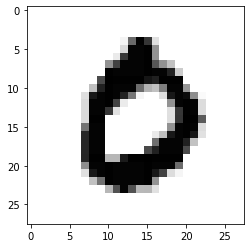

In [7]:
i=3
plt.imshow(X_test[i].reshape(28,28),cmap='gray_r')
print("True label :"+str(np.argmax(Y_test[i])))
print("Predicted label :"+str(np.argmax(Y[i])))

True label :9
Predicted label :9


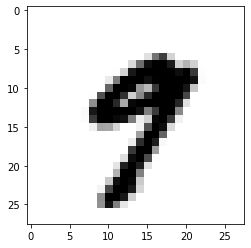

In [8]:
i=20
plt.imshow(X_test[i].reshape(28,28),cmap='gray_r')
print("True label :"+str(np.argmax(Y_test[i])))
print("Predicted label :"+str(np.argmax(Y[i])))

True label :6
Predicted label :6


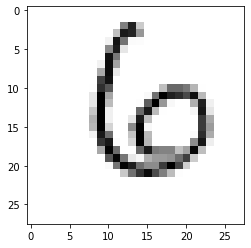

In [9]:
i=100
plt.imshow(X_test[i].reshape(28,28),cmap='gray_r')
print("True label :"+str(np.argmax(Y_test[i])))
print("Predicted label :"+str(np.argmax(Y[i])))

True label :3
Predicted label :3


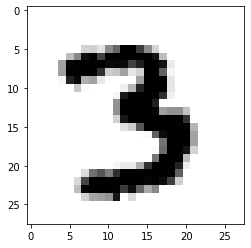

In [10]:
i=500
plt.imshow(X_test[i].reshape(28,28),cmap='gray_r')
print("True label :"+str(np.argmax(Y_test[i])))
print("Predicted label :"+str(np.argmax(Y[i])))

In [11]:
print("Total correctly predicted : "+str(np.sum((np.argmax(Y,axis=1)==np.argmax(Y_test,axis=1))))+" out of "+str(Y_test.shape[0]))

Total correctly predicted : 9717 out of 10000
